               V1          V2
count  312.000000  312.000000
mean     0.532234    0.467642
std      0.252156    0.238860
min      0.000000    0.000000
25%      0.342401    0.293478
50%      0.529361    0.457391
75%      0.704663    0.642174
max      1.000000    1.000000
---------------------Etude exploratoire préliminaire---------------------


Spiral
                0           1           2
count  312.000000  312.000000  312.000000
mean    18.408173   16.344712    2.016026
std      7.299923    6.867232    0.815682
min      3.000000    2.900000    1.000000
25%     12.912500   11.337500    1.000000
50%     18.325000   16.050000    2.000000
75%     23.400000   21.362500    3.000000
max     31.950000   31.650000    3.000000
Flame
                0           1           2
count  240.000000  240.000000  240.000000
mean     7.323750   20.928542    1.637500
std      3.202509    3.383390    0.481727
min      0.500000   14.450000    1.000000
25%      5.250000   18.237500    1.000000
50%      7.

{'whiskers': [<matplotlib.lines.Line2D at 0x2e46c6d0b80>,
 'caps': [<matplotlib.lines.Line2D at 0x2e46c6df280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e46c6d0820>,
 'medians': [<matplotlib.lines.Line2D at 0x2e46c6df940>,
 'fliers': [<matplotlib.lines.Line2D at 0x2e46c6dfca0>,
 'means': []}

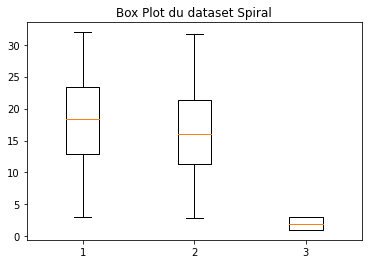

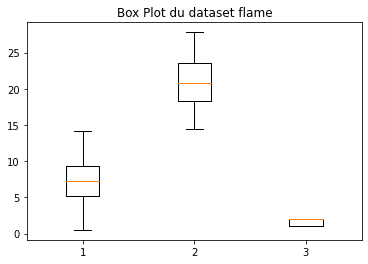

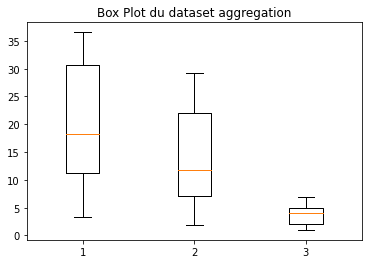

In [1]:
####################################l'import des bibliothèques##########################################################
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
import pandas as pd
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
## bayesien
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
####################################l'import des bibliothèques##########################################################

#####################################fonction de récupération des données#################################################
def recuperer_donnee_file(fichier):
    
    f = open(fichier, "r")
    matrice=[]
    
    for i in f:
        line= i.split("\t")
        x = len(line)
        line[x-1]=line[x-1][:-1]
        matrice.append(line)
    mat=pd.DataFrame(matrice)
    
    for j in mat:
        mat[j]= mat[j].astype(float)
    return mat
#####################################fonction de récupération des données##################################################

######################################fonction de normalisation########################################################

def normalisation(dataframe):
    x = dataframe.iloc[:, :-1].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    dataframe = pd.DataFrame(x_scaled,columns=["V1","V2"])
    return dataframe

######################################fonction de normalisation#######################################################

data_spiral = recuperer_donnee_file("data/spiral.txt")
data_flame = recuperer_donnee_file("data/flame.txt")
data_agg = recuperer_donnee_file("data/Aggregation.txt")

# à lire : je pense que l'étude des datasets est faite que sur les variables non labelisées.
# la variable "classe " est le label de chaque dataset car on trouve que c'est une énumération. 
# donc la classification se fera par rapport aux classes donc on ne va pas la normaliser ou calculer sa moyenne et tout. 
#c'est mon avis qu'est-ce-que vous en dites 
# étude exploratoire préliminaire 

norm_spiral= normalisation(data_spiral)
norm_flame= normalisation(data_flame)
norm_agg=normalisation(data_agg)
print(norm_spiral.describe())

####################################### étude exploratoire préliminaire #############################################

print("---------------------Etude exploratoire préliminaire---------------------\n\n")
print("Spiral")
print(data_spiral.describe())

print("Flame")
print(data_flame.describe())

print("Aggregation")
print(data_agg.describe())



#box plot de chaque dataset 

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot du dataset Spiral')
ax1.boxplot(data_spiral)
fig2, ax2 = plt.subplots()
ax2.set_title('Box Plot du dataset flame')
ax2.boxplot(data_flame)
fig3, ax3 = plt.subplots()
ax3.set_title('Box Plot du dataset aggregation')
ax3.boxplot(data_agg)

####################################### étude exploratoire préliminaire #############################################

le nombre de k idéal est l'un des valeur de la liste indice +1
[0, 1, 2, 3, 4, 5, 6]
par choix nous avons pris le plus grand 
7



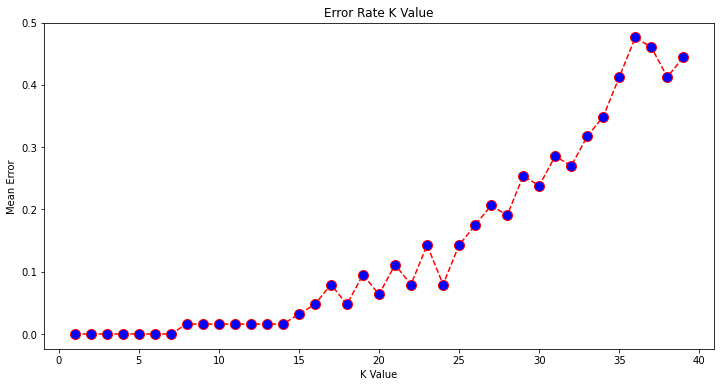

In [9]:
 ######################################## KNN ####################################################################

def knn(data,s):

    # les variables à étudier :
    s.append(data.iloc[:,-1])
    X = s.values
    # la variable classe " type d'appartenance"
    y = data.iloc[:, -1].values

    # création des données de test et d'entrainement

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    # Le choix du k 
    error = []

    # Calcul des erreurs en k variant 
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error.append(np.mean(pred_i != y_test))

    print("le nombre de k idéal est l'un des valeur de la liste indice +1")   
    indices = [i for i, x in enumerate(error) if x == min(error)]
    print(indices)
    print("par choix nous avons pris le plus grand ")
    print(int(indices[-1])+1)
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    knn = KNeighborsClassifier(n_neighbors=int(indices[-1])+1)
    knn.fit(X_train, y_train)
    
    print()
knn(data_spiral,norm_spiral)

In [3]:
######################################### bayesien naif###########################################################

def bayesien_naif(data,s):
    #On sépare les données et les classes
    x = s
    y = data.iloc[:,-1]
    #On fractionne les datas (train-test)
    x_train, x_test, y_train, y_test = train_test_split(s,y,test_size=0.20,random_state=42)
    print(x_train.shape)
    print(x_test.shape)
    print(y_test.shape)
    print(y_train.shape)
    #On instancie le modèle
    model_Gaussian = GaussianNB()
    
    #Entrainement
    model_Gaussian.fit(x_train, y_train)
    
    #Prédiction
    prediction = model_Gaussian.predict(x_test)
    print(prediction)
    
    #On évalue le model afin de connaitre sa précision, la valeur est donnée entre 0 et 1 (d'où le *100)
    precision = accuracy_score(y_test, prediction)*100
    print(precision)
    


bayesien_naif(data_spiral,norm_spiral)
bayesien_naif(data_flame,norm_flame)
bayesien_naif(data_agg,norm_agg)

(249, 2)
(63, 2)
(63,)
(249,)
[2. 3. 2. 2. 3. 2. 1. 2. 1. 2. 2. 3. 3. 1. 3. 3. 1. 2. 3. 3. 2. 3. 2. 2.
 2. 1. 3. 3. 1. 3. 2. 1. 1. 3. 1. 2. 2. 3. 3. 1. 2. 3. 2. 1. 2. 1. 1. 1.
 3. 2. 1. 2. 1. 1. 1. 3. 2. 2. 2. 2. 2. 1. 1.]
36.507936507936506
(192, 2)
(48, 2)
(48,)
(192,)
[2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2.
 1. 2. 2. 1. 1. 2. 2. 1. 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 1. 2. 2. 2. 1. 2.]
97.91666666666666
(630, 2)
(158, 2)
(158,)
(630,)
[3. 2. 4. 7. 4. 4. 3. 4. 4. 2. 6. 4. 7. 4. 2. 2. 3. 4. 4. 5. 3. 4. 6. 3.
 2. 4. 6. 3. 6. 5. 4. 5. 3. 4. 2. 3. 6. 3. 6. 4. 3. 4. 6. 6. 6. 3. 2. 2.
 6. 2. 6. 5. 6. 2. 2. 4. 4. 2. 4. 4. 3. 3. 2. 6. 2. 2. 4. 4. 4. 6. 4. 4.
 4. 4. 1. 4. 4. 4. 4. 4. 2. 2. 1. 7. 6. 2. 3. 6. 1. 6. 6. 4. 4. 2. 2. 6.
 1. 4. 3. 4. 1. 2. 4. 4. 2. 4. 4. 6. 2. 6. 6. 5. 4. 3. 3. 4. 2. 1. 7. 4.
 2. 6. 4. 6. 4. 2. 4. 6. 4. 6. 4. 4. 1. 4. 2. 3. 2. 4. 4. 1. 2. 4. 6. 1.
 4. 4. 1. 3. 2. 4. 4. 3. 4. 2. 2. 4. 3. 4.]
99.36708860759494


           V1        V2
0    1.000000  0.175652
1    0.972366  0.153043
2    0.948187  0.130435
3    0.922280  0.107826
4    0.894646  0.092174
..        ...       ...
307  0.440415  0.380870
308  0.436960  0.387826
309  0.436960  0.394783
310  0.436960  0.403478
311  0.436960  0.406957

[312 rows x 2 columns]
           V1        V2
263  0.839378  0.504348
56   0.347150  0.706087
96   0.668394  0.448696
218  0.032815  0.579130
146  0.742660  0.168696
..        ...       ...
62   0.454231  0.728696
247  0.702936  0.791304
169  0.322971  0.295652
72   0.611399  0.683478
256  0.820380  0.638261

[187 rows x 2 columns]
263    2.0
56     3.0
96     3.0
218    2.0
146    1.0
      ... 
62     3.0
247    2.0
169    1.0
72     3.0
256    2.0
Name: 2, Length: 187, dtype: float64
0.984
je suis
[1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 3. 2. 1. 2. 3. 3. 1. 1. 2. 3. 3. 1. 3. 2.
 1. 3. 2. 3. 1. 3. 1. 3. 1. 2. 1. 2. 3. 1. 3. 2. 2. 1. 1. 2. 3. 1. 1. 1.
 2. 2. 3. 1. 1. 3. 2. 1. 3. 1. 2. 3. 2. 3. 2. 2. 2. 3. 3. 

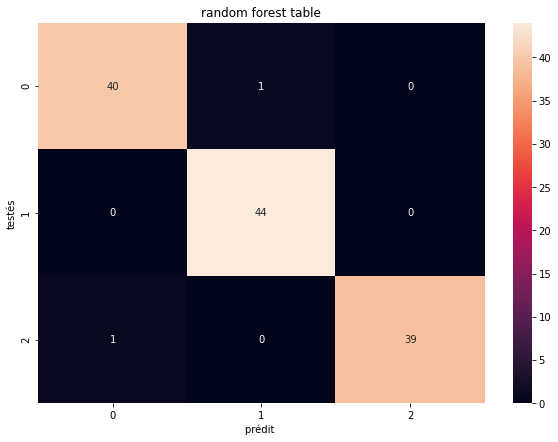

In [4]:
############################### Random forest############################################################
def random_forest(data,s):
    x = s
    print(x)
    y = data.iloc[:,-1]
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.4)
    print(x_train)
    print(y_train)
    #n_estimators : le nombre d'arbres générés
    aleatoire = RandomForestClassifier()
    aleatoire.fit(x_train, y_train)
    a=aleatoire.score(x_test, y_test)
    print(a)
    prediction= aleatoire.predict(x_test)
    print('je suis')
    print(prediction)
    cm = confusion_matrix(y_test, prediction)
    print(cm)
    plt.figure(figsize=(10, 7))
    sn.heatmap(cm, annot=True)
    plt.title('random forest table')
    plt.xlabel('prédit ')
    plt.ylabel('testés')

random_forest(data_spiral,norm_spiral)



In [5]:
################################################ LDA ############################################################
print("LDA")
def LDA(data,s):  
    X = s
    y = data.iloc[:,-1]
    lda = LinearDiscriminantAnalysis()
    lda.fit(X,y)
    print(lda.score(X,y))
LDA(data_flame, norm_flame)
############################################### LDA #############################################################

############################################### QDA #############################################################
print("QDA")
def QDA(data,s):
    X = s
    y = data.iloc[:,-1]
    qda = QuadraticDiscriminantAnalysis()
    model = qda.fit(X, y)
    print(model.score(X,y))
QDA(data_flame,norm_flame)
############################################### QDA #############################################################

############################################## Decision tree ###################################################
print("decision tree")
def decision_tree(data,s):
    x = s
    y = data.iloc[:,-1]
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=1)
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier()

    # Train Decision Tree Classifer
    clf = clf.fit(x_train,y_train)
    
    #Predict the response for test dataset
    y_pred = clf.predict(x_test)
    print("Accuracy:",accuracy_score(y_test, y_pred))

decision_tree(data_flame,norm_flame)
############################################## Decision Tree ###################################################

LDA
0.8791666666666667
QDA
0.9625
decision tree
Accuracy: 0.9861111111111112


In [6]:
########################################## SVM linear #########################################################

from sklearn.svm import SVC
from sklearn.metrics import classification_report

def SVM_Linear(data,s):
    X = s
    y = data.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    sm = svm.score(X_test,y_test)
    print("le score est ")
    print(sm)
    y_pred = svm.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
########################################## SVM  linear ##########################################################

########################################## SVM non linear  #########################################################

from sklearn.svm import SVC
from sklearn.metrics import classification_report

def SVM_Linear(data,s):
    X = s
    y = data.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)
    svm = SVC(kernel='poly')
    svm.fit(X_train, y_train)
    sm = svm.score(X_test,y_test)
    print("le score est ")
    print(sm)
    y_pred = svm.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
########################################## SVM  non linear ##########################################################
    
SVM_Linear(data_flame,norm_flame)


le score est 
0.9791666666666666
[[16  0]
 [ 1 31]]
              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97        16
         2.0       1.00      0.97      0.98        32

    accuracy                           0.98        48
   macro avg       0.97      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



In [7]:
########################################## Linear reggression ###################################################
from sklearn.linear_model import LogisticRegression 
def regression_lineaire(data,s):
    X = s
    y = data.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(y_pred)
    m = model.score(X_test,y_pred)
    print(m)
######################################### Linear regression ######################################################

regression_lineaire(data_flame, norm_flame)


[1. 1. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2.
 1. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
1.0


In [8]:
def recuperation_csv(fichier):
    x = pd.read_csv(fichier)
    print("les données :")
    print(x)
    return x


############################################## transformation de données #######################################

def tansformation_donnees(data):
    

############################################## transformation de données #######################################
credit_card = recuperation_csv("data/creditcard.csv")
knn(credit_card,s)


IndentationError: expected an indented block (<ipython-input-8-1a5b1dc5b567>, line 14)

In [53]:
def recuperer_donnee_visapremier(fichier):
    
    f = open(fichier, "r")
    matrice=[]
    
    for i in f:
        line= i.split("\t")
        x = len(line)
        
        line[x-1]=line[x-1][:-1]
        matrice.append(line)
    mat=pd.DataFrame(matrice)
    
    return mat

#recuperer_donnee_visapremier("data/VisaPremier.txt")
df_visa = pd.read_csv("data/Visapremier.txt", sep="\t")

#Le jeu de donné ne continet donc pas de valeur NaN
df_visa.isna().values.any() 

#On récupere toutes les valeurs qui ne sont pas numériques
str_var = df_visa.select_dtypes(exclude=np.number).columns.tolist() 


['departem', 'sexe', 'sitfamil', 'csp', 'codeqlt', 'agemvt', 'nbpaiecb', 'cartevp']


,departem_.,departem_11,departem_12,departem_13,departem_14,departem_16,departem_17,departem_24,departem_31,departem_32,...,nbpaiecb_59,nbpaiecb_6,nbpaiecb_63,nbpaiecb_65,nbpaiecb_69,nbpaiecb_7,nbpaiecb_8,nbpaiecb_9,cartevp_Cnon,cartevp_Coui
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1069,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1070,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Dans cette partie nous allons determiner les variables à utiliser dans notre model

In [80]:
from sklearn import decomposition
from sklearn.preprocessing import OrdinalEncoder

#Outil pour passer de cat en nombre
enc = OrdinalEncoder()
df_visa_tr = df_visa.copy()

#on remplace les valeurs categorielles en leur codage numerique
df_visa_tr[str_var]=enc.fit_transform(df_visa[str_var])

#recuperation de la variable à expliquer
Y = df_visa_tr.cartevpr

#suppression de la variable à expliquer (elle existe en double)
df_visa_tr.drop(columns=['cartevp', 'cartevpr'], inplace=True)

# Centrage et Réduction
X_scale = preprocessing.StandardScaler().fit_transform(df_visa_tr)

# Calcul des composantes principales
pca = decomposition.PCA(n_components='mle', svd_solver='full')

pca

PCA(n_components='mle', svd_solver='full')

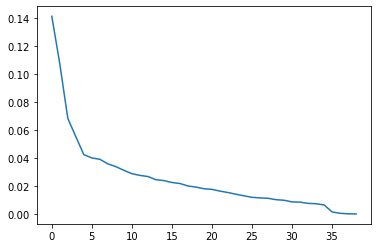

In [78]:
#Ici on verifie l'importance des composantes extraites par la pca en fonction de leur variance expliquée
plt.plot(pca.explained_variance_ratio_)

#On comprend que les ~20 premiers variables sont importantes et que le reste l'est moins
